## Проект 2
#### Необходимо проверить следующее:

1. Проверить, отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение. Насколько обучение сокращает время прохождения этапов?

2. Посмотреть, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. Нужно доказать, что успешное обучение само по себе влияет на оплату, и без разницы, каким этапом оно шло.

3. Дополнительная задача. Как часто пользователи начинают обучение после того, как они выбрали уровень сложности? Это позволит нам понять, насколько прозрачен процесс взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.

Проверка будет на основе данных пользователей, которые зарегистрировались в 2018 году (с 1 января по 31 декабря 2018 года включительно).

In [1]:
import pandas as pd

In [2]:
from datetime import datetime, timedelta

In [3]:
import seaborn as sb
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

1. Получаем данные

In [4]:
events = pd.read_csv('events.csv')
purchases = pd.read_csv('purchase.xls')

2. Обзор данных

In [5]:
display(events)

,id,event_type,selected_level,start_time,tutorial_id,user_id
0,28903,registration,NaN,2016-05-11T23:40:55,NaN,12583
1,28904,registration,NaN,2016-05-11T23:49:58,NaN,12584
2,28905,registration,NaN,2016-05-12T00:53:07,NaN,12585
3,28906,tutorial_start,NaN,2016-05-12T01:32:20,17562.0,12585
4,28907,tutorial_finish,NaN,2016-05-12T01:34:53,17562.0,12585
...,...,...,...,...,...,...
252329,281232,level_choice,hard,2020-07-02T10:02:15,NaN,87439
252330,281233,level_choice,medium,2020-07-02T11:38:52,NaN,87488
252331,281234,pack_choice,NaN,2020-07-02T11:42:14,NaN,87488
252332,281235,tutorial_start,NaN,2020-07-02T13:32:58,86127.0,87464


In [6]:
display(purchases)

,id,user_id,event_datetime,amount
0,15674,12584,2016-05-12T10:34:16,100
1,15675,12985,2016-05-13T08:25:56,50
2,15676,12828,2016-05-13T16:33:46,50
3,15677,12598,2016-05-14T01:09:37,150
4,15678,13037,2016-05-14T01:24:46,100
...,...,...,...,...
5951,21625,87331,2020-07-06T09:02:07,50
5952,21626,87418,2020-07-06T14:16:37,100
5953,21627,87431,2020-07-06T22:48:59,50
5954,21628,87363,2020-07-07T05:38:56,100


3. Пользователи, зарегистрировавшиеся в 2018 году, в датафрейме events.

In [7]:
condition1 = (events.start_time>='2018-01-01') & (events.start_time<'2019-01-01') & (events.event_type=='registration')
registered = events[condition1].user_id.to_list() # список пользователей, зарег. в 2018
events18 = events[events.user_id.isin(registered)]
display(events18)

,id,event_type,selected_level,start_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01T03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01T04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01T08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01T11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01T13:28:07,NaN,27836
...,...,...,...,...,...,...
118359,147262,tutorial_start,NaN,2019-01-01T03:26:18,49554.0,47756
118360,147263,tutorial_finish,NaN,2019-01-01T03:29:25,49554.0,47756
118362,147265,level_choice,easy,2019-01-01T05:04:52,NaN,47755
118363,147266,level_choice,medium,2019-01-01T05:42:11,NaN,47756


In [8]:
events18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66959 entries, 51405 to 118364
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              66959 non-null  int64  
 1   event_type      66959 non-null  object 
 2   selected_level  8342 non-null   object 
 3   start_time      66959 non-null  object 
 4   tutorial_id     32954 non-null  float64
 5   user_id         66959 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.6+ MB


4. Покупки, совершенные пользователями в 2018 году, из датафрейма purchases.

In [9]:
condition2 = (events.start_time>='2018-01-01') & (events.start_time<'2019-01-01') & (events.event_type=='registration')
registered = events[condition2].user_id.to_list()
purch18 = purchases[purchases.user_id.isin(registered)]
purch18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1171 to 2778
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1600 non-null   int64 
 1   user_id         1600 non-null   int64 
 2   event_datetime  1600 non-null   object
 3   amount          1600 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.5+ KB


In [10]:
purch18.describe()

,id,user_id,amount
count,1600.000000,1600.000000,1600.000000
mean,17645.505625,37752.766250,110.734375
std,462.038637,5822.621784,54.696628
min,16845.000000,27845.000000,25.000000
25%,17245.750000,32815.750000,50.000000
50%,17645.500000,37633.500000,100.000000
75%,18045.250000,43023.000000,150.000000
max,18452.000000,47742.000000,300.000000


#### Объединим датафреймы events и purchases для удобного анализа. Данные за 2018 год.

In [11]:
cond = (events.start_time>='2018-01-01') & (events.start_time<'2019-01-01') & (events.event_type=='registration')
registered = events[cond]['user_id'].to_list()
ev18 = events[events.user_id.isin(registered)]

purchases['event_type'] = 'purchase'
purch18 = purchases[purchases.user_id.isin(registered)]

events18 = ev18.rename(columns={'id':'event_id', 'start_time':'event_time'})
purchase18 = purch18.rename(columns={'id':'purchase_id', 'event_datetime':'purchase_time'})
total_events18 = pd.concat([events18,purchase18],sort=False)
total_events18['event_time'] = pd.to_datetime(total_events18['event_time'])
total_events18['purchase_time'] = pd.to_datetime(total_events18['purchase_time'])
total_events18.event_time = pd.to_datetime(total_events18.event_time, format = '%Y-%m-%dT%H:%M:%S')
total_events18.purchase_time = pd.to_datetime(total_events18.purchase_time, format = '%Y-%m-%dT%H:%M:%S')

In [12]:
total_events18

,event_id,event_type,selected_level,event_time,tutorial_id,user_id,purchase_id,purchase_time,amount
51405,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaT,NaN
51406,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaT,NaN
51407,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaT,NaN
51408,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaT,NaN
51409,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...
2767,NaN,purchase,NaN,NaT,NaN,47498,18441.0,2019-01-02 03:48:19,100.0
2768,NaN,purchase,NaN,NaT,NaN,47647,18442.0,2019-01-02 23:26:26,150.0
2769,NaN,purchase,NaN,NaT,NaN,47554,18443.0,2019-01-03 00:36:36,50.0
2774,NaN,purchase,NaN,NaT,NaN,47742,18448.0,2019-01-04 12:51:41,50.0


In [13]:
total_events18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68559 entries, 51405 to 2778
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        66959 non-null  float64       
 1   event_type      68559 non-null  object        
 2   selected_level  8342 non-null   object        
 3   event_time      66959 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         68559 non-null  int64         
 6   purchase_id     1600 non-null   float64       
 7   purchase_time   1600 non-null   datetime64[ns]
 8   amount          1600 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 5.2+ MB


Сбросим продублированные индексы в объединенных датафреймах

In [14]:
total_events18 = total_events18.reset_index(drop=True).sort_values('event_time')

Посмотрим на имеющиеся точки пути пользователей (по порядку совершения действия):

In [15]:
total_events18['event_type'].unique()

array(['registration', 'tutorial_start', 'tutorial_finish',
       'level_choice', 'pack_choice', 'purchase'], dtype=object)

### 1. Для проверки первой гипотезы необходимо разделить игроков на два лагеря: те, кто прошел обучение и купил платные уровни (есть события tutorial_finish и purchase) и те, кто даже не приступал к обучению, но также оплатил платные уровни.

Используем множества чтобы создать список пользователей с учетом выбранного параметра. Пока без исключения дубликатов.

In [16]:
reg_users = set(total_events18[total_events18['event_type'] == 'registration']['user_id'])
tutorial_start_users = set(total_events18[total_events18['event_type'] == 'tutorial_start']['user_id'])
tutorial_finish_users = set(total_events18[total_events18['event_type'] == 'tutorial_finish']['user_id'])
tutorial_not_started_users = reg_users - tutorial_start_users

Теперь используя анонимную функцию распределим пользователей по группам с обучением и закончивших его, и уберем дубликаты.

In [17]:
total_events18['group'] = total_events18.apply(lambda x: 'with_tutorial' if x['user_id'] in tutorial_finish_users
                                               else 'started_no_finished', axis=1)
print('no_tutorial', len(tutorial_not_started_users))

print(total_events18.drop_duplicates('user_id').loc[:,'group'].value_counts())

no_tutorial 8068
with_tutorial          10250
started_no_finished     9676
Name: group, dtype: int64


Сделаем сводную таблицу для группы с пройденным обучением и посмотрим на нее:

In [18]:
users_with_tutorial = total_events18.loc[total_events18['user_id'].isin(tutorial_finish_users)].pivot_table(values=['event_time','purchase_time'], index=['user_id'], columns=['event_type'], aggfunc='min')
users_with_tutorial.columns=list(map('_'.join,users_with_tutorial))

In [19]:
users_with_tutorial.head()

,event_time_level_choice,event_time_pack_choice,event_time_registration,event_time_tutorial_finish,event_time_tutorial_start,purchase_time_purchase
user_id,,,,,,
27833,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,NaT
27834,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,NaT
27835,2018-01-01 20:37:22,2018-01-01 20:38:43,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,NaT
27836,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,NaT
27839,2018-01-01 22:37:50,2018-01-01 22:42:54,2018-01-01 18:24:01,2018-01-01 19:16:32,2018-01-01 19:11:36,NaT


Далее посчтаем разницу во времени между всеми событиями для группы, прошедшей обучение, через сводную таблицу и выведем их как результат

In [20]:
users_with_tutorial['delta_reg_to_lvl'] = users_with_tutorial['event_time_level_choice']-users_with_tutorial['event_time_registration']
users_with_tutorial['delta_lvl_to_pack'] = users_with_tutorial['event_time_pack_choice']-users_with_tutorial['event_time_level_choice']
users_with_tutorial['delta_pack_to_purch'] = users_with_tutorial['purchase_time_purchase']-users_with_tutorial['event_time_pack_choice']

print('Среднее время от регистрации до выбора уровня сложности "with tutorial": ',(users_with_tutorial['delta_reg_to_lvl']).mean())
print('Среднее время от выбора уровня сложности до выбора пакета бесплатных вопросов "with tutorial": ',(users_with_tutorial['delta_lvl_to_pack']).mean())
print('Среднее время от выбора пакета бесплатных вопросов до покупки пакета вопросов "with tutorial": ',(users_with_tutorial['delta_pack_to_purch']).mean())

Среднее время от регистрации до выбора уровня сложности "with tutorial":  0 days 07:05:36.854819357
Среднее время от выбора уровня сложности до выбора пакета бесплатных вопросов "with tutorial":  0 days 00:05:18.146058732
Среднее время от выбора пакета бесплатных вопросов до покупки пакета вопросов "with tutorial":  3 days 17:17:59.641326883


Сделаем все то же самое для группы, не прошедшей обучение

In [21]:
users_no_tutorial = total_events18.loc[total_events18['user_id'].isin(tutorial_not_started_users)].pivot_table(values=['event_time','purchase_time'], index=['user_id'], columns=['event_type'], aggfunc='min')
users_no_tutorial.columns=list(map('_'.join,users_no_tutorial))
users_no_tutorial.head()

,event_time_level_choice,event_time_pack_choice,event_time_registration,purchase_time_purchase
user_id,,,,
27832,NaT,NaT,2018-01-01 03:48:40,NaT
27837,NaT,NaT,2018-01-01 14:08:40,NaT
27838,NaT,NaT,2018-01-01 14:42:58,NaT
27844,NaT,NaT,2018-01-02 00:13:22,NaT
27848,NaT,NaT,2018-01-02 06:05:02,NaT


In [22]:
users_no_tutorial['delta_reg_to_lvl'] = users_no_tutorial['event_time_level_choice']-users_no_tutorial['event_time_registration']
users_no_tutorial['delta_lvl_to_pack'] = users_no_tutorial['event_time_pack_choice']-users_no_tutorial['event_time_level_choice']
users_no_tutorial['delta_pack_to_purch'] = users_no_tutorial['purchase_time_purchase']-users_no_tutorial['event_time_pack_choice']

print('Среднее время от регистрации до выбора уровня сложности "no tutorial": ',(users_no_tutorial['delta_reg_to_lvl']).mean())
print('Среднее время от выбора уровня сложности до выбора пакета бесплатных вопросов "no tutorial": ',(users_no_tutorial['delta_lvl_to_pack']).mean())
print('Среднее время от выбора пакета бесплатных вопросов до покупки пакета вопросов "no tutorial": ',(users_no_tutorial['delta_pack_to_purch']).mean())

Среднее время от регистрации до выбора уровня сложности "no tutorial":  0 days 05:15:33.122448979
Среднее время от выбора уровня сложности до выбора пакета бесплатных вопросов "no tutorial":  0 days 00:05:23.824324324
Среднее время от выбора пакета бесплатных вопросов до покупки пакета вопросов "no tutorial":  4 days 04:49:33.590909090


#### Уже на этом этапе можно увидеть разницу во времени между двумя группами:
После прохождения бесплатных вопросов, группа, прошедшая обучение, купила платные уровни в среднем через 3 дня 17 часов.
А группа, которая не стала проходить обучение после бесплатных вопросов купила пакет уровней в среднем только через 4 дня 4 часа. Это говорит о том, что первая группа приняла решение о покупке быстрее второй и обучение влияет на последующую покупку.

Объединим получившиеся датасеты и посмотрим на результаты через визуализацию.
От регистрации до выбора уровня проходит в среднем несколько часов, поэтому будет правильнее сравнивать в часах.
От выбора уровня до бесплатного набора вопросов у пользователей уходят минуты - будем сравнивать в них.
Что до оплаты, то здесь пользователям требуются дни - здесь сравнение будет в днях.

In [23]:
users_with_tutorial["group"] = 'with_tutorial'
users_no_tutorial["group"] = 'no_tutorial'

tut_total = pd.concat([users_with_tutorial, users_no_tutorial], sort = False).reset_index()
tut_total['reg_to_lvl'] = (tut_total['delta_reg_to_lvl'])/pd.Timedelta('1H')
tut_total['lvl_to_pack'] = (tut_total['delta_lvl_to_pack'])/pd.Timedelta('1M')
tut_total['pack_to_purch'] = (tut_total['delta_pack_to_purch'])/pd.Timedelta('1D')
group_pivot = tut_total[['group', 'reg_to_lvl', 'lvl_to_pack', 'pack_to_purch']]
group_pivot

,group,reg_to_lvl,lvl_to_pack,pack_to_purch
0,with_tutorial,NaN,NaN,NaN
1,with_tutorial,NaN,NaN,NaN
2,with_tutorial,8.709722,1.350000,NaN
3,with_tutorial,NaN,NaN,NaN
4,with_tutorial,4.230278,5.066667,NaN
...,...,...,...,...
18313,no_tutorial,NaN,NaN,NaN
18314,no_tutorial,NaN,NaN,NaN
18315,no_tutorial,NaN,NaN,NaN
18316,no_tutorial,NaN,NaN,NaN


Text(0.5, 1.0, 'Бесплатный пакет -> покупка, дни')

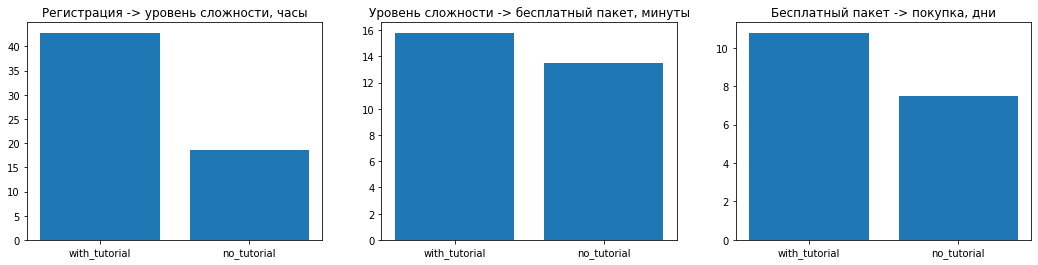

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18,4))

axes[0].bar(x = group_pivot['group'],height = group_pivot['reg_to_lvl'])
axes[0].set_title('Регистрация -> уровень сложности, часы')

axes[1].bar(x = group_pivot['group'],height = group_pivot['lvl_to_pack'])
axes[1].set_title('Уровень сложности -> бесплатный пакет, минуты')

axes[2].bar(x = group_pivot['group'],height = group_pivot['pack_to_purch'])
axes[2].set_title('Бесплатный пакет -> покупка, дни')

Как можно заметить, есть некоторая разница между группами, которые прошли обучение, и теми, которые - нет.
- от регистрации до уровня сложности группе с обучение понадобилось больше часов, что естественно, тк пользователи все это время потратили на обучалку
- после выбора уровня сложности до перехода к бесплатным пакетам разница небольшая между пользователями разных групп, поэтому обучение здесь не имело влияние
- после бесплатных вопросов до покупки платных заметна разница - быстрее всего вопросы купили те, кто прошел обучалку, быстрее в среднем почти на 1 день

Можно поработать над тем, чтобы мотивировать как можно больше участников проходить обучение.

### 2. Следующая гипотеза - проверить есть ли зависимость между количеством прохождений и вероятностью оплаты 

In [25]:
#вспомогательная строка с количеством пользователей
lvl_choice = total_events18[total_events18['event_type'] == 'level_choice']['user_id'].nunique()
free_pack = total_events18[total_events18['event_type'] == 'pack_choice']['user_id'].nunique()
paid_users = total_events18[total_events18['event_type'] == 'purchase']['user_id'].nunique()
print('Кол-во зарегистрировавшихся пользователей - {}'.format(len(reg_users)))
print('Кол-во начавших обучение пользователй - {}'.format(len(tutorial_start_users)))
print('Кол-во закончивших обучение - {}'.format(len(tutorial_finish_users)))
print('Кол-во не начинавших обучение - {}'.format(len(tutorial_not_started_users)))
print('Кол-во выбравших уровень - {}'.format(lvl_choice))
print('Кол-во выбравших бесплатный пакет - {}'.format(free_pack))
print('Кол-во оплативших пакеты - {}'.format(paid_users))

Кол-во зарегистрировавшихся пользователей - 19926
Кол-во начавших обучение пользователй - 11858
Кол-во закончивших обучение - 10250
Кол-во не начинавших обучение - 8068
Кол-во выбравших уровень - 8342
Кол-во выбравших бесплатный пакет - 5737
Кол-во оплативших пакеты - 1600


Посчитаем по каждому пользователю количество начатых обучений и количество оплат в двух датафреймах:

In [26]:
users_start_tutorial = total_events18.groupby(['user_id'])['event_type']\
.apply(lambda x: (x=='tutorial_start').sum()).reset_index().rename(columns={'event_type': 'tutorial_start_count'})
users_paid = total_events18.groupby(['user_id'])['event_type']\
.apply(lambda x: (x=='purchase').sum()).reset_index().rename(columns={'event_type': 'purchase_count'})

Объединим в один датафрейм и посмотрим на него:

In [27]:
users_with_tutorial_purchase = users_start_tutorial.merge(users_paid, how="inner", on="user_id")
users_with_tutorial_purchase

,user_id,tutorial_start_count,purchase_count
0,27832,0,0
1,27833,1,0
2,27834,1,0
3,27835,1,0
4,27836,2,0
...,...,...,...
19921,47753,1,0
19922,47754,0,0
19923,47755,1,0
19924,47756,1,0


Теперь сделаем датасет, в котором посчитаем количество пользователей, для которых будет показана связь между кол-вом начал обучения и кол-вом покупок:

In [28]:
group_df = users_with_tutorial_purchase.groupby(['tutorial_start_count']).agg({'user_id': 'count', 'purchase_count': 'sum'}).reset_index()
group_df_final = group_df[['user_id', 'tutorial_start_count', 'purchase_count']].rename(columns={'user_id':'user_id_count'}).sort_values('purchase_count')
group_df_final

,user_id_count,tutorial_start_count,purchase_count
7,94,7,12
8,86,8,13
6,116,6,14
5,109,5,16
9,113,9,17
0,8068,0,22
4,221,4,30
3,427,3,51
2,1589,2,218
1,9103,1,1207


Абсолютные значения нам показывают большую зависимость от количества прохождений обучения, но так ли это на самом деле мы можем проверить через доли оплат.

In [29]:
group_df_final['share_of_paid'] = round((group_df_final['purchase_count']/group_df_final['user_id_count'])*100,2)
group_df_final['share_of_reg'] = round((group_df_final['user_id_count']/len(reg_users))*100,2)
group_df_final

,user_id_count,tutorial_start_count,purchase_count,share_of_paid,share_of_reg
7,94,7,12,12.77,0.47
8,86,8,13,15.12,0.43
6,116,6,14,12.07,0.58
5,109,5,16,14.68,0.55
9,113,9,17,15.04,0.57
0,8068,0,22,0.27,40.49
4,221,4,30,13.57,1.11
3,427,3,51,11.94,2.14
2,1589,2,218,13.72,7.97
1,9103,1,1207,13.26,45.68


Попробуем визуализировать полученный датасет:

<AxesSubplot:xlabel='user_id_count,tutorial_start_count'>

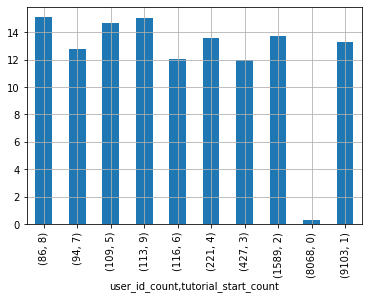

In [30]:
group_df_final.groupby(by= ['user_id_count', 'tutorial_start_count'])['share_of_paid'].mean().plot(kind= 'bar' ,grid=True)

#### В целом по второй гипотезе можно сделать вывод о следующем:
- Вероятность оплат пакетов услуг не зависит от количества раз пройденного обучения
- Те, кто обучение даже не начинал, покупал пакеты неохотнее всех, а учитывая также то, что таких пользователей довольно много (40,5%) так что можно сказать, что факт начала обучения напрямую влияет на покупку вопросов.

### 3. Также есть смысл проверить еще один вопрос - как часто пользователи после выбора уровня сложности возварщались к обучению.

Для этого нам нужны события level_choice и tutorial_start, которые мы возьмем в один датафрейм.

In [31]:
level_choice2 = total_events18[total_events18['event_type'] == 'level_choice'][['event_time', 'user_id']].rename(columns={'event_time':'level_time'})
tutorial_start2 = total_events18[total_events18['event_type']=='tutorial_start'][['event_time', 'user_id']].rename(columns={'event_time':'tutorial_time'})
level_tutorial_df = pd.merge(level_choice2, tutorial_start2, on = 'user_id')
level_tutorial_df

,level_time,user_id,tutorial_time
0,2018-01-01 20:37:22,27835,2018-01-01 15:00:51
1,2018-01-01 22:37:50,27839,2018-01-01 19:11:36
2,2018-01-02 05:18:42,27840,2018-01-02 02:07:07
3,2018-01-02 06:19:18,27845,2018-01-02 03:03:44
4,2018-01-02 06:19:18,27845,2018-01-02 07:08:00
...,...,...,...
12681,2018-12-31 09:59:00,47732,2018-12-31 07:14:38
12682,2018-12-31 12:24:40,47747,2018-12-31 10:21:11
12683,2018-12-31 22:36:19,47753,2018-12-31 20:54:56
12684,2019-01-01 05:04:52,47755,2019-01-01 00:08:14


Добавим разницу во времени между событиями и оставим только положиельные результаты.

In [32]:
level_tutorial_df['timedelta'] = level_tutorial_df['tutorial_time'] - level_tutorial_df['level_time']
level_tutorial_df = level_tutorial_df[level_tutorial_df.timedelta>pd.Timedelta(0)].reset_index(drop=True)
level_tutorial_df

,level_time,user_id,tutorial_time,timedelta
0,2018-01-02 06:19:18,27845,2018-01-02 07:08:00,0 days 00:48:42
1,2018-01-02 08:46:03,27842,2018-01-02 09:01:51,0 days 00:15:48
2,2018-01-02 08:46:03,27842,2018-01-02 18:08:01,0 days 09:21:58
3,2018-01-02 18:39:44,27852,2018-01-02 20:34:31,0 days 01:54:47
4,2018-01-03 04:19:32,27862,2018-01-03 11:17:41,0 days 06:58:09
...,...,...,...,...
2787,2018-12-28 11:43:38,47635,2018-12-28 17:28:42,0 days 05:45:04
2788,2018-12-28 21:25:49,47657,2018-12-28 21:44:13,0 days 00:18:24
2789,2018-12-28 21:25:49,47657,2018-12-28 21:53:06,0 days 00:27:17
2790,2018-12-29 21:23:23,47711,2018-12-29 22:50:57,0 days 01:27:34


Теперь отдельно посмотрим на количество возвратов к обучению:

In [33]:
new_tutorial = level_tutorial_df.user_id.value_counts().reset_index().rename(columns={'user_id': 'new_tut_cnt'})
new_tutorial['new_tut_cnt'].value_counts()

1    819
2    229
3    116
4     77
5     57
6     51
7     28
8      9
Name: new_tut_cnt, dtype: int64

<AxesSubplot:title={'center':'Количество пользователей на количество возвращений к обучению'}, ylabel='new_tut_cnt'>

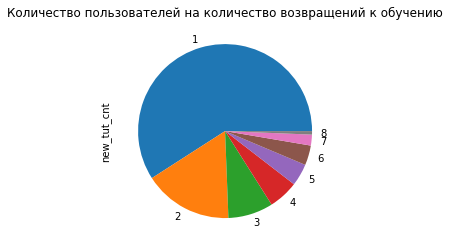

In [34]:
new_tutorial['new_tut_cnt'].value_counts().plot(kind = 'pie', title = 'Количество пользователей на количество возвращений к обучению')

In [35]:
share_of_return = (new_tutorial['new_tut_cnt'].value_counts().sum())/(tutorial_start2['user_id'].nunique())
print('Доля возвращений к обучению от общего числа начавших обучение - {:.2%}'.format(share_of_return))

Доля возвращений к обучению от общего числа начавших обучение - 11.69%


### Вывод, который можно сделать: большинство пользователей, которые дошли до выбора уровня сложности возвращались к обучению хотя бы 1 раз. Всего таких пользователей около 12% от числа начавших обучение. 
### Доля довольно большая, следовательно, есть смысл обратить внимание на то, после какого уровня сложности игроки возвращаются к повторению и пересмотреть уровни и перестроить приложение на более интуитивно понятное. 